In [1]:
import sys
sys.path.append('../src')
from utils import *
import pandas as pd

df = pd.read_csv('../data/Sports_and_Outdoors_5_2016_2018.csv')
df = df[['reviewerID', 'asin']]
df = df.drop_duplicates()
df.head()

,reviewerID,asin
0,ASAE9FBGAJQAH,0899332757
1,A1TAW91SQSU2AH,0899332757
2,A1SVGO4GMEOXQ0,0899332757
3,A36QT6N7N0GF3O,0899332757
4,AJGZDX7KC5TVQ,0899332757


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1315215 entries, 0 to 1366264
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   reviewerID  1315215 non-null  object
 1   asin        1315215 non-null  object
dtypes: object(2)
memory usage: 30.1+ MB


In [3]:
# df = df.head(300000)

In [4]:
# Transform the dataframe to a transactionnal dataframe
df = df.groupby('reviewerID')['asin'].apply(list).reset_index(name='items')
df['items'] = df['items'].apply(lambda x: list(set(x)))
df

,reviewerID,items
0,A0001528BGUBOEVR6T5U,[B012ZIGVXE]
1,A0024836TBQJ1WBE4VDY,"[B01A8NH5ZG, B00PRVLMK4, B00E2217I6, B001GH4WD..."
2,A0029274J35Q1MYNKUWO,"[B000N8MURA, B00HTN4R6O, B00162LR6W, B0018E9FV..."
3,A0036244LFNO78OM4135,"[B003BLP0I2, B00R7AGTKG, B01BE07ZKW, B002SK0Y0..."
4,A0065811S4ANKB4TYHII,"[B004R5V47C, B00OHJDDPY, B0002IMP94]"
...,...,...
262080,AZZW780H8VJ8N,"[B000P431BG, B000O57MPW, B01E4YVCOA, B001O2PKG..."
262081,AZZYI1EW1WY3M,"[B00CPJ5464, B00ZCEP9G4, B01489QOOO, B00DDZGCO..."
262082,AZZYVIRS854I7,"[B0159JSKYE, B006NZ65L4, B00318CLTG, B00ZK4ZU1U]"
262083,AZZYW4YOE1B6E,"[B00HN47G1M, B013CVSXF2, B005YPK9SY, B002WN91Q2]"


In [5]:
df.to_csv('../data/transactional.csv', index=False, header=False)

In [14]:
df = df.head(200000)

In [15]:
# Count number of unique reviewers
reviewers = df['reviewerID'].unique()
len(reviewers)

200000

In [16]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

In [17]:
# Use the transaction encoder to transform the dataframe to a one-hot encoded boolean dataframe
te = TransactionEncoder()
te_ary = te.fit(df['items']).transform(df['items'])
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,0000032034,0899332757,0899333257,0971100764,1926644425,3843518912,7245456275,7245456313,9877000490,B000002NUS,...,B01HJ4DN08,B01HJ4EYS8,B01HJ8YC0Y,B01HJA241G,B01HJA7KWE,B01HJDGJ1E,B01HJDHNX2,B01HJDZ34I,B01HJGAJ9O,B01HJHHBHG
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Save df as transactions.csv
df.to_csv('../data/transactions.csv', index=False)

In [22]:
# Call to the apriori algorithm
frequent_itemsets = apriori(df, min_support=0.002, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.004250,(B00079ULA8)
1,0.003015,(B000MF63M2)
2,0.002050,(B000OTG7FE)
3,0.004790,(B000VAPCU2)
4,0.002510,(B0012Q2S4W)
...,...,...
147,0.002095,"(B00N3XXXCS, B016UQXB26, B016UQXB5I, B00VHX8G5A)"
148,0.002095,"(B016UQXB26, B016UQXB5I, B00PD8JOTW, B00VHX8G5A)"
149,0.004875,"(B00TZ900I4, B00SK74C5Y, B00SI9UB7M, B00RM8I0LE)"
150,0.004785,"(B00TZ900I4, B00SI9UB7M, B00RM8I0LE, B000VAPCU..."


<Axes: xlabel='length'>

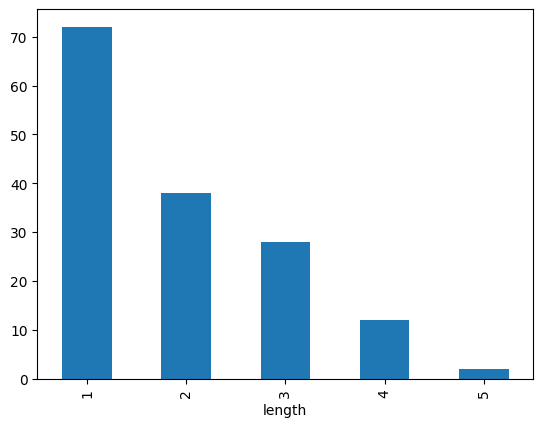

In [23]:
# Plot distrubution of length of frequent itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets['length'].value_counts().plot.bar()

In [25]:

from pattern_mining import create_and_fit_lcm

patterns = create_and_fit_lcm(df, supp_ratio=0.002)

TypeError: dtype '<class 'list'>' not understood